In [ ]:
from google.colab import drive
drive.mount('/content/Splitdataset0101')

Mounted at /content/Splitdataset0101


In [ ]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.1 MB/s eta 0:00:00


In [ ]:
pip install optuna matplotlib

In [ ]:


# Import necessary libraries

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.optimizers import Adam, SGD, RMSprop
import tensorflow as tf
import cv2
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import random
from glob import glob
import imageio
from sklearn.preprocessing import LabelBinarizer
import shutil
from tensorflow.keras.models import load_model
import optuna
from keras.applications import MobileNetV2
from re import VERBOSE
import gc
#from tensorflow.keras.models import Model
#from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
#from tensorflow.keras.applications import MobileNetV2
#from sklearn.model_selection import train_test_split
import optuna
#from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import optuna.visualization as optuna_viz


In [ ]:


# Replace '/content/drive/MyDrive/Dataset/train_dataset' with your actual train path
source_path = '/content/Splitdataset0101/MyDrive/train_dataset'
destination_path = '/content/local_train_dataset'

# Copy the dataset
shutil.copytree(source_path, destination_path)


'/content/local_train_dataset'

In [ ]:

source_path = '/content/Splitdataset0101/MyDrive/valid_dataset'
destination_path = '/content/local_Valid_dataset'

# Copy the dataset
shutil.copytree(source_path, destination_path)

'/content/local_Valid_dataset'

In [ ]:

source_path = '/content/Splitdataset0101/MyDrive/test_dataset'
destination_path = '/content/local_test_dataset'

# Copy the dataset
shutil.copytree(source_path, destination_path)

'/content/local_test_dataset'

In [ ]:
# all train class names...
train_dir = sorted(os.listdir('/content/local_train_dataset'))
class_names_lst = [dir_name for dir_name in train_dir]
class_names_lst

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherd’s Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

In [ ]:
# all train class names...
val_dir = sorted(os.listdir('/content/local_test_dataset'))
class_names_lst = [dir_name for dir_name in val_dir]
class_names_lst

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherd’s Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

In [ ]:
# all train class names...
test_dir = sorted(os.listdir('/content/local_Valid_dataset'))
class_names_lst = [dir_name for dir_name in test_dir]
class_names_lst

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherd’s Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

In [ ]:
data_path = '/content/'
train_dir = os.path.join(data_path,'local_train_dataset')
test_dir = os.path.join(data_path, 'local_test_dataset')
val_dir = os.path.join(data_path, 'local_Valid_dataset')

In [ ]:
images_path= os.path.join(train_dir, '*', '*.png')
images = glob(images_path)

img_size = 224
train_images = []
train_labels = []
for i in images:
    train_images.append(cv2.resize(cv2.imread(i), (img_size, img_size)))
    train_labels.append(i.split('/')[-2])
train_X = np.asarray(train_images)
train_Y = pd.DataFrame(train_labels)

In [ ]:
images_path= os.path.join(val_dir, '*', '*.png')
images = glob(images_path)

img_size = 224
valid_images = []
valid_labels = []
for i in images:
    valid_images.append(cv2.resize(cv2.imread(i), (img_size, img_size)))
    valid_labels.append(i.split('/')[-2])
valid_X = np.asarray(valid_images)
valid_Y = pd.DataFrame(valid_labels)

In [ ]:
images_path= os.path.join(test_dir, '*', '*.png')
images = glob(images_path)

img_size = 224
test_images = []
test_labels = []
for i in images:
    test_images.append(cv2.resize(cv2.imread(i), (img_size, img_size)))
    test_labels.append(i.split('/')[-2])
test_X = np.asarray(test_images)
test_Y = pd.DataFrame(test_labels)

In [ ]:
# Get a list of subdirectories (categories) in the train path
categories = [category for category in os.listdir(source_path) if os.path.isdir(os.path.join(source_path, category))]

# Initialize total count
total_images = 0

# Print the count of images in each category and accumulate the total count
for category in categories:
    category_path = os.path.join(source_path, category)
    num_images = len(os.listdir(category_path))
    total_images += num_images
    print(f"Category: {category}, Number of Images: {num_images}")

# Print the total count of images across all categories
print(f"\nTotal Number of Images Across All Categories: {total_images}")

Category: Shepherd’s Purse, Number of Images: 29
Category: Loose Silky-bent, Number of Images: 78
Category: Scentless Mayweed, Number of Images: 62
Category: Common wheat, Number of Images: 23
Category: Common Chickweed, Number of Images: 66
Category: Charlock, Number of Images: 50
Category: Sugar beet, Number of Images: 54
Category: Maize, Number of Images: 18
Category: Fat Hen, Number of Images: 51
Category: Small-flowered Cranesbill, Number of Images: 51
Category: Cleavers, Number of Images: 31
Category: Black-grass, Number of Images: 41

Total Number of Images Across All Categories: 554


In [ ]:
test_Y

,0
0,Fat Hen
1,Fat Hen
2,Fat Hen
3,Fat Hen
4,Fat Hen
...,...
549,Sugar beet
550,Sugar beet
551,Sugar beet
552,Sugar beet


In [ ]:
train_Y.rename(columns={0:'species'},inplace=True)
_, train_count = np.unique(train_Y,return_counts=True)
train_df = pd.DataFrame(data = train_count)
a = train_Y['species'].unique()
a = a.tolist()
a.sort()
train_df['Index'] = a
train_df.columns = ['Train','Name']
train_df

,Train,Name
0,212,Black-grass
1,323,Charlock
2,252,Cleavers
3,541,Common Chickweed
4,177,Common wheat
5,387,Fat Hen
6,556,Loose Silky-bent
7,189,Maize
8,414,Scentless Mayweed
9,187,Shepherd’s Purse


In [ ]:
y_train = LabelBinarizer().fit_transform(train_Y.species)
train_label = np.array(y_train,dtype=np.float32)
train_label

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
valid_Y.rename(columns={0:'species'},inplace=True)
_, valid_count = np.unique(valid_Y,return_counts=True)
valid_df = pd.DataFrame(data = valid_count)
a = valid_Y['species'].unique()
a = a.tolist()
a.sort()
valid_df['Index'] = a
valid_df.columns = ['Valid','Name']
valid_df

,Valid,Name
0,56,Black-grass
1,79,Charlock
2,52,Cleavers
3,106,Common Chickweed
4,53,Common wheat
5,100,Fat Hen
6,128,Loose Silky-bent
7,50,Maize
8,131,Scentless Mayweed
9,58,Shepherd’s Purse


In [ ]:
y_valid = LabelBinarizer().fit_transform(valid_Y.species)
valid_label = np.array(y_valid,dtype=np.float32)
valid_label

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
test_Y.rename(columns={0:'species'},inplace=True)
_, test_count = np.unique(test_Y,return_counts=True)
test_df = pd.DataFrame(data = test_count)
a = test_Y['species'].unique()
a = a.tolist()
a.sort()
test_df['Index'] = a
test_df.columns = ['Test','Name']
test_df

,Test,Name
0,41,Black-grass
1,50,Charlock
2,31,Cleavers
3,66,Common Chickweed
4,23,Common wheat
5,51,Fat Hen
6,78,Loose Silky-bent
7,18,Maize
8,62,Scentless Mayweed
9,29,Shepherd’s Purse


In [ ]:
y_test = LabelBinarizer().fit_transform(test_Y.species)
test_label = np.array(y_test,dtype=np.float32)
test_label

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
X_train = train_X.astype('float32') / 255
X_test = test_X.astype('float32') / 255
X_valid = valid_X.astype('float32') / 255

### MobileNetV2

# **TEST HYPER PARAMETER OPTIMIZATION**

In [ ]:

# Define the search space
def objective(trial):


    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False

    # Define the Keras model with hyperparameters


    # Create a new model and set MobileNetV2 as its input
    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())  # Global average pooling layer
    model.add(Dense(1024, activation='relu'))

    # Dropout rate
    dropout_rate = trial.suggest_float('dropout_rate', 0.2, 0.7)
    model.add(Dropout(rate=dropout_rate))

    model.add(Dense(12, activation='softmax'))

    # Choose the optimizer based on the hyperparameter
    optimizer_name = trial.suggest_categorical('optimizer', ['sgd', 'adam', 'rmsprop'])
    if optimizer_name == 'sgd':
        optimizer = SGD(learning_rate=trial.suggest_float('learning_rate_sgd', 1e-3, 1e-1))
    elif optimizer_name == 'adam':
        optimizer = Adam(learning_rate=trial.suggest_float('learning_rate_adam', 1e-3, 1e-1))
    elif optimizer_name == 'rmsprop':
        optimizer = RMSprop(learning_rate=trial.suggest_float('learning_rate_rmsprop', 1e-3, 1e-1))

    # Compile the model
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Number of epochs
    epochs = trial.suggest_int('epochs', 25, 100)

    # Batch size
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128])

    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

     # Create a ModelCheckpoint callback to save the best model
    checkpoint_path = '/content/best_model.h5'
    checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', mode='max')

    datagen = ImageDataGenerator(
        rotation_range=180,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        vertical_flip=True
    )
    datagen.fit(X_train)
    datagen.fit(X_valid)




    # Train the model
    model.fit(datagen.flow(X_train, train_label,batch_size=batch_size,), epochs=epochs,
          validation_data=datagen.flow(X_valid, valid_label), callbacks=[early_stopping, checkpoint], verbose=0)

    # Evaluate on the Validation set
    val_loss, val_accuracy = model.evaluate(X_valid, valid_label)

    # Evaluate on the Test set
    test_loss, test_accuracy = model.evaluate(X_test, test_label)

    # Garbage collection
    gc.collect()

    # Return the validation loss as the objective to minimize
    return val_accuracy

# Perform hyperparameter optimization with Optuna
study_save_path = 'sqlite:////content/optuna_study.db'
study = optuna.create_study(direction='maximize', storage=study_save_path)
study.optimize(objective, n_trials=50)

# Get the best hyperparameters
best_params = study.best_params
print("Best hyperparameters:", best_params)


[I 2024-01-04 16:36:58,904] A new study created in RDB with name: no-name-ea659305-93c7-4971-b900-f2a2a418a92c


18/18 [==============================] - 4s 193ms/step - loss: 0.9462 - accuracy: 0.6913


[I 2024-01-04 16:48:23,417] Trial 0 finished with value: 0.6710130572319031 and parameters: {'dropout_rate': 0.5730365002180458, 'optimizer': 'adam', 'learning_rate_adam': 0.009393369694755984, 'epochs': 100, 'batch_size': 32}. Best is trial 0 with value: 0.6710130572319031.


18/18 [==============================] - 4s 192ms/step - loss: 0.4893 - accuracy: 0.8285


[I 2024-01-04 17:15:35,817] Trial 1 finished with value: 0.8314945101737976 and parameters: {'dropout_rate': 0.2094460069435941, 'optimizer': 'sgd', 'learning_rate_sgd': 0.03723056073659597, 'epochs': 60, 'batch_size': 64}. Best is trial 1 with value: 0.8314945101737976.


18/18 [==============================] - 3s 181ms/step - loss: 2.3074 - accuracy: 0.1931


[I 2024-01-04 17:23:46,116] Trial 2 finished with value: 0.16449348628520966 and parameters: {'dropout_rate': 0.20912390115174, 'optimizer': 'adam', 'learning_rate_adam': 0.053177653098985374, 'epochs': 75, 'batch_size': 64}. Best is trial 1 with value: 0.8314945101737976.


18/18 [==============================] - 3s 160ms/step - loss: 2.4003 - accuracy: 0.1516


[I 2024-01-04 17:39:44,767] Trial 3 finished with value: 0.1303911805152893 and parameters: {'dropout_rate': 0.42757075319227966, 'optimizer': 'rmsprop', 'learning_rate_rmsprop': 0.09012585961264646, 'epochs': 97, 'batch_size': 64}. Best is trial 1 with value: 0.8314945101737976.


18/18 [==============================] - 3s 190ms/step - loss: 0.5248 - accuracy: 0.8105


[I 2024-01-04 18:00:07,732] Trial 4 finished with value: 0.7983951568603516 and parameters: {'dropout_rate': 0.5795874706931907, 'optimizer': 'sgd', 'learning_rate_sgd': 0.022214690337107844, 'epochs': 31, 'batch_size': 32}. Best is trial 1 with value: 0.8314945101737976.


18/18 [==============================] - 4s 199ms/step - loss: 2.2615 - accuracy: 0.2148


[I 2024-01-04 18:10:38,521] Trial 5 finished with value: 0.18054161965847015 and parameters: {'dropout_rate': 0.46522278457445326, 'optimizer': 'rmsprop', 'learning_rate_rmsprop': 0.05088255410949261, 'epochs': 38, 'batch_size': 64}. Best is trial 1 with value: 0.8314945101737976.


18/18 [==============================] - 4s 192ms/step - loss: 0.4277 - accuracy: 0.8412


[I 2024-01-04 18:43:54,255] Trial 6 finished with value: 0.8485456109046936 and parameters: {'dropout_rate': 0.2905126331747714, 'optimizer': 'sgd', 'learning_rate_sgd': 0.04080339455738369, 'epochs': 75, 'batch_size': 32}. Best is trial 6 with value: 0.8485456109046936.


18/18 [==============================] - 3s 191ms/step - loss: 2.1743 - accuracy: 0.2617


[I 2024-01-04 18:52:34,578] Trial 7 finished with value: 0.2457372099161148 and parameters: {'dropout_rate': 0.3749103930125717, 'optimizer': 'rmsprop', 'learning_rate_rmsprop': 0.04830770512426506, 'epochs': 44, 'batch_size': 128}. Best is trial 6 with value: 0.8485456109046936.


18/18 [==============================] - 3s 181ms/step - loss: 2.2905 - accuracy: 0.2491


[I 2024-01-04 19:00:31,754] Trial 8 finished with value: 0.21063189208507538 and parameters: {'dropout_rate': 0.3844927064408531, 'optimizer': 'adam', 'learning_rate_adam': 0.04444206301169071, 'epochs': 39, 'batch_size': 32}. Best is trial 6 with value: 0.8485456109046936.


18/18 [==============================] - 3s 185ms/step - loss: 2.3232 - accuracy: 0.1841


[I 2024-01-04 19:07:42,614] Trial 9 finished with value: 0.17051152884960175 and parameters: {'dropout_rate': 0.44085096883667274, 'optimizer': 'adam', 'learning_rate_adam': 0.09842051936750873, 'epochs': 53, 'batch_size': 128}. Best is trial 6 with value: 0.8485456109046936.


18/18 [==============================] - 3s 174ms/step - loss: 0.6106 - accuracy: 0.7780


[I 2024-01-04 19:22:50,940] Trial 10 finished with value: 0.7683049440383911 and parameters: {'dropout_rate': 0.3052355932775513, 'optimizer': 'sgd', 'learning_rate_sgd': 0.09142330458223535, 'epochs': 77, 'batch_size': 32}. Best is trial 6 with value: 0.8485456109046936.


18/18 [==============================] - 3s 192ms/step - loss: 0.4300 - accuracy: 0.8375


[I 2024-01-04 19:53:05,629] Trial 11 finished with value: 0.841524600982666 and parameters: {'dropout_rate': 0.20056670379470493, 'optimizer': 'sgd', 'learning_rate_sgd': 0.04446308228488128, 'epochs': 67, 'batch_size': 64}. Best is trial 6 with value: 0.8485456109046936.


18/18 [==============================] - 3s 189ms/step - loss: 0.4540 - accuracy: 0.8484


[I 2024-01-04 20:21:08,841] Trial 12 finished with value: 0.8365095257759094 and parameters: {'dropout_rate': 0.2983626383592766, 'optimizer': 'sgd', 'learning_rate_sgd': 0.058609615329917125, 'epochs': 75, 'batch_size': 64}. Best is trial 6 with value: 0.8485456109046936.


18/18 [==============================] - 3s 186ms/step - loss: 0.4952 - accuracy: 0.8249


[I 2024-01-04 20:40:32,779] Trial 13 finished with value: 0.8324974775314331 and parameters: {'dropout_rate': 0.2864855955893311, 'optimizer': 'sgd', 'learning_rate_sgd': 0.05378442401272959, 'epochs': 83, 'batch_size': 32}. Best is trial 6 with value: 0.8485456109046936.


18/18 [==============================] - 3s 188ms/step - loss: 0.5952 - accuracy: 0.7834


[I 2024-01-04 21:32:04,106] Trial 14 finished with value: 0.7733199596405029 and parameters: {'dropout_rate': 0.6972854389757496, 'optimizer': 'sgd', 'learning_rate_sgd': 0.01187051533432875, 'epochs': 64, 'batch_size': 128}. Best is trial 6 with value: 0.8485456109046936.


18/18 [==============================] - 4s 201ms/step - loss: 0.4359 - accuracy: 0.8321


[I 2024-01-04 22:06:05,443] Trial 15 finished with value: 0.8505516648292542 and parameters: {'dropout_rate': 0.2589076931763278, 'optimizer': 'sgd', 'learning_rate_sgd': 0.06846722949595016, 'epochs': 88, 'batch_size': 64}. Best is trial 15 with value: 0.8505516648292542.


18/18 [==============================] - 4s 193ms/step - loss: 0.4510 - accuracy: 0.8466


[I 2024-01-04 22:34:47,188] Trial 16 finished with value: 0.8375125527381897 and parameters: {'dropout_rate': 0.2718409054875577, 'optimizer': 'sgd', 'learning_rate_sgd': 0.07826585441838574, 'epochs': 89, 'batch_size': 32}. Best is trial 15 with value: 0.8505516648292542.


18/18 [==============================] - 4s 203ms/step - loss: 0.4378 - accuracy: 0.8484


[I 2024-01-04 23:08:06,565] Trial 17 finished with value: 0.8535606861114502 and parameters: {'dropout_rate': 0.3503892154480756, 'optimizer': 'sgd', 'learning_rate_sgd': 0.0706078910929985, 'epochs': 90, 'batch_size': 32}. Best is trial 17 with value: 0.8535606861114502.


18/18 [==============================] - 3s 188ms/step - loss: 0.5563 - accuracy: 0.7726


[I 2024-01-04 23:32:17,304] Trial 18 finished with value: 0.7853560447692871 and parameters: {'dropout_rate': 0.362471338093785, 'optimizer': 'sgd', 'learning_rate_sgd': 0.07204689017745232, 'epochs': 91, 'batch_size': 64}. Best is trial 17 with value: 0.8535606861114502.


18/18 [==============================] - 3s 190ms/step - loss: 0.5632 - accuracy: 0.8141


[I 2024-01-04 23:53:28,854] Trial 19 finished with value: 0.8124372959136963 and parameters: {'dropout_rate': 0.5089805204755098, 'optimizer': 'rmsprop', 'learning_rate_rmsprop': 0.0031714892137151493, 'epochs': 87, 'batch_size': 128}. Best is trial 17 with value: 0.8535606861114502.


18/18 [==============================] - 4s 194ms/step - loss: 0.5390 - accuracy: 0.8051


[I 2024-01-05 00:11:35,993] Trial 20 finished with value: 0.8154463171958923 and parameters: {'dropout_rate': 0.34407679482404535, 'optimizer': 'sgd', 'learning_rate_sgd': 0.09631800218457462, 'epochs': 93, 'batch_size': 64}. Best is trial 17 with value: 0.8535606861114502.


18/18 [==============================] - 4s 197ms/step - loss: 0.4518 - accuracy: 0.8195


[I 2024-01-05 00:35:23,335] Trial 21 finished with value: 0.841524600982666 and parameters: {'dropout_rate': 0.2620558856277423, 'optimizer': 'sgd', 'learning_rate_sgd': 0.06666744915088846, 'epochs': 82, 'batch_size': 32}. Best is trial 17 with value: 0.8535606861114502.


18/18 [==============================] - 3s 180ms/step - loss: 0.4184 - accuracy: 0.8502


[I 2024-01-05 01:05:06,050] Trial 22 finished with value: 0.8435305953025818 and parameters: {'dropout_rate': 0.3244684609974568, 'optimizer': 'sgd', 'learning_rate_sgd': 0.03178030977462554, 'epochs': 81, 'batch_size': 32}. Best is trial 17 with value: 0.8535606861114502.


18/18 [==============================] - 3s 173ms/step - loss: 0.4057 - accuracy: 0.8412


[I 2024-01-05 01:33:37,222] Trial 23 finished with value: 0.8445336222648621 and parameters: {'dropout_rate': 0.24807418728616099, 'optimizer': 'sgd', 'learning_rate_sgd': 0.08331974091199777, 'epochs': 70, 'batch_size': 32}. Best is trial 17 with value: 0.8535606861114502.


18/18 [==============================] - 3s 182ms/step - loss: 0.4105 - accuracy: 0.8303


[I 2024-01-05 02:02:04,384] Trial 24 finished with value: 0.8445336222648621 and parameters: {'dropout_rate': 0.40643668974200514, 'optimizer': 'sgd', 'learning_rate_sgd': 0.06093305205910208, 'epochs': 95, 'batch_size': 32}. Best is trial 17 with value: 0.8535606861114502.


18/18 [==============================] - 3s 184ms/step - loss: 0.4971 - accuracy: 0.8051


[I 2024-01-05 02:25:22,202] Trial 25 finished with value: 0.8214644193649292 and parameters: {'dropout_rate': 0.33438000040340626, 'optimizer': 'sgd', 'learning_rate_sgd': 0.04788307906938911, 'epochs': 59, 'batch_size': 32}. Best is trial 17 with value: 0.8535606861114502.


18/18 [==============================] - 3s 180ms/step - loss: 0.4848 - accuracy: 0.8321


[I 2024-01-05 02:42:18,156] Trial 26 finished with value: 0.8034102320671082 and parameters: {'dropout_rate': 0.23815961093649915, 'optimizer': 'sgd', 'learning_rate_sgd': 0.067736109262945, 'epochs': 86, 'batch_size': 32}. Best is trial 17 with value: 0.8535606861114502.


18/18 [==============================] - 4s 192ms/step - loss: 0.6705 - accuracy: 0.7545


[I 2024-01-05 03:14:43,642] Trial 27 finished with value: 0.7632898688316345 and parameters: {'dropout_rate': 0.30146862515508266, 'optimizer': 'sgd', 'learning_rate_sgd': 0.0022865903454707404, 'epochs': 69, 'batch_size': 32}. Best is trial 17 with value: 0.8535606861114502.


18/18 [==============================] - 3s 172ms/step - loss: 2.2731 - accuracy: 0.2148


[I 2024-01-05 03:22:52,065] Trial 28 finished with value: 0.1885657012462616 and parameters: {'dropout_rate': 0.4697310148371043, 'optimizer': 'adam', 'learning_rate_adam': 0.09603106709776407, 'epochs': 78, 'batch_size': 128}. Best is trial 17 with value: 0.8535606861114502.


18/18 [==============================] - 3s 174ms/step - loss: 0.5536 - accuracy: 0.8105


[I 2024-01-05 03:54:34,416] Trial 29 finished with value: 0.826479434967041 and parameters: {'dropout_rate': 0.5588640019968311, 'optimizer': 'rmsprop', 'learning_rate_rmsprop': 0.004038956534466856, 'epochs': 100, 'batch_size': 64}. Best is trial 17 with value: 0.8535606861114502.


18/18 [==============================] - 3s 176ms/step - loss: 0.5295 - accuracy: 0.7906


[I 2024-01-05 04:07:21,592] Trial 30 finished with value: 0.8134403228759766 and parameters: {'dropout_rate': 0.4035003538497267, 'optimizer': 'adam', 'learning_rate_adam': 0.0018552042182132522, 'epochs': 100, 'batch_size': 32}. Best is trial 17 with value: 0.8535606861114502.


18/18 [==============================] - 3s 175ms/step - loss: 0.4655 - accuracy: 0.8394


[I 2024-01-05 04:29:30,746] Trial 31 finished with value: 0.8345035314559937 and parameters: {'dropout_rate': 0.2514388210325489, 'optimizer': 'sgd', 'learning_rate_sgd': 0.07944041289067706, 'epochs': 71, 'batch_size': 32}. Best is trial 17 with value: 0.8535606861114502.


18/18 [==============================] - 3s 170ms/step - loss: 0.4460 - accuracy: 0.8339


[I 2024-01-05 04:52:38,529] Trial 32 finished with value: 0.8405215740203857 and parameters: {'dropout_rate': 0.2373710256892731, 'optimizer': 'sgd', 'learning_rate_sgd': 0.0871902545204084, 'epochs': 57, 'batch_size': 32}. Best is trial 17 with value: 0.8535606861114502.


18/18 [==============================] - 3s 174ms/step - loss: 0.4717 - accuracy: 0.8357


[I 2024-01-05 05:16:06,465] Trial 33 finished with value: 0.8314945101737976 and parameters: {'dropout_rate': 0.2260884449727875, 'optimizer': 'sgd', 'learning_rate_sgd': 0.08026591318909651, 'epochs': 71, 'batch_size': 32}. Best is trial 17 with value: 0.8535606861114502.


18/18 [==============================] - 3s 169ms/step - loss: 0.4202 - accuracy: 0.8357


[I 2024-01-05 05:43:19,099] Trial 34 finished with value: 0.8475426435470581 and parameters: {'dropout_rate': 0.2652679083367966, 'optimizer': 'sgd', 'learning_rate_sgd': 0.07304948823766982, 'epochs': 86, 'batch_size': 32}. Best is trial 17 with value: 0.8535606861114502.


18/18 [==============================] - 3s 166ms/step - loss: 0.4272 - accuracy: 0.8249


[I 2024-01-05 06:10:41,567] Trial 35 finished with value: 0.8405215740203857 and parameters: {'dropout_rate': 0.33149112275526216, 'optimizer': 'sgd', 'learning_rate_sgd': 0.07028421811484556, 'epochs': 84, 'batch_size': 64}. Best is trial 17 with value: 0.8535606861114502.


18/18 [==============================] - 3s 176ms/step - loss: 0.4844 - accuracy: 0.8141


[I 2024-01-05 06:30:43,665] Trial 36 finished with value: 0.8294884562492371 and parameters: {'dropout_rate': 0.27974376193453776, 'optimizer': 'sgd', 'learning_rate_sgd': 0.06054549506257573, 'epochs': 91, 'batch_size': 32}. Best is trial 17 with value: 0.8535606861114502.


18/18 [==============================] - 3s 173ms/step - loss: 2.4033 - accuracy: 0.1516


[I 2024-01-05 06:45:05,410] Trial 37 finished with value: 0.13340020179748535 and parameters: {'dropout_rate': 0.35840550194091636, 'optimizer': 'rmsprop', 'learning_rate_rmsprop': 0.09941042563272318, 'epochs': 95, 'batch_size': 64}. Best is trial 17 with value: 0.8535606861114502.


18/18 [==============================] - 3s 174ms/step - loss: 2.4192 - accuracy: 0.1408


[I 2024-01-05 07:02:01,220] Trial 38 finished with value: 0.12938816845417023 and parameters: {'dropout_rate': 0.31981059522029825, 'optimizer': 'adam', 'learning_rate_adam': 0.0633019681778425, 'epochs': 81, 'batch_size': 32}. Best is trial 17 with value: 0.8535606861114502.


18/18 [==============================] - 3s 177ms/step - loss: 0.4023 - accuracy: 0.8520


[I 2024-01-05 07:45:48,434] Trial 39 finished with value: 0.8595787286758423 and parameters: {'dropout_rate': 0.2029146518720278, 'optimizer': 'sgd', 'learning_rate_sgd': 0.03467920208576053, 'epochs': 76, 'batch_size': 64}. Best is trial 39 with value: 0.8595787286758423.


18/18 [==============================] - 3s 167ms/step - loss: 2.0404 - accuracy: 0.2671


[I 2024-01-05 07:55:50,959] Trial 40 finished with value: 0.24172517657279968 and parameters: {'dropout_rate': 0.2144488854973569, 'optimizer': 'rmsprop', 'learning_rate_rmsprop': 0.04273382250933938, 'epochs': 78, 'batch_size': 64}. Best is trial 39 with value: 0.8595787286758423.


18/18 [==============================] - 3s 179ms/step - loss: 0.4366 - accuracy: 0.8484


[I 2024-01-05 08:24:31,322] Trial 41 finished with value: 0.8425275683403015 and parameters: {'dropout_rate': 0.276557314762188, 'optimizer': 'sgd', 'learning_rate_sgd': 0.036758269478014485, 'epochs': 75, 'batch_size': 64}. Best is trial 39 with value: 0.8595787286758423.


18/18 [==============================] - 3s 172ms/step - loss: 0.4155 - accuracy: 0.8394


[I 2024-01-05 09:07:36,260] Trial 42 finished with value: 0.8284854292869568 and parameters: {'dropout_rate': 0.20038651174677452, 'optimizer': 'sgd', 'learning_rate_sgd': 0.02792454075369728, 'epochs': 90, 'batch_size': 64}. Best is trial 39 with value: 0.8595787286758423.


18/18 [==============================] - 3s 170ms/step - loss: 0.4144 - accuracy: 0.8538


[I 2024-01-05 09:36:15,562] Trial 43 finished with value: 0.841524600982666 and parameters: {'dropout_rate': 0.22900503677842007, 'optimizer': 'sgd', 'learning_rate_sgd': 0.04223273762325402, 'epochs': 26, 'batch_size': 64}. Best is trial 39 with value: 0.8595787286758423.


18/18 [==============================] - 3s 175ms/step - loss: 0.4745 - accuracy: 0.8375


[I 2024-01-05 09:56:04,039] Trial 44 finished with value: 0.8385155200958252 and parameters: {'dropout_rate': 0.25728612856265776, 'optimizer': 'sgd', 'learning_rate_sgd': 0.051286094184493966, 'epochs': 86, 'batch_size': 64}. Best is trial 39 with value: 0.8595787286758423.


18/18 [==============================] - 3s 190ms/step - loss: 0.4623 - accuracy: 0.8430


[I 2024-01-05 10:42:28,150] Trial 45 finished with value: 0.8365095257759094 and parameters: {'dropout_rate': 0.3018242419107552, 'optimizer': 'sgd', 'learning_rate_sgd': 0.03843853489924197, 'epochs': 64, 'batch_size': 128}. Best is trial 39 with value: 0.8595787286758423.


18/18 [==============================] - 3s 190ms/step - loss: 0.5268 - accuracy: 0.8123


[I 2024-01-05 11:16:23,344] Trial 46 finished with value: 0.8224673867225647 and parameters: {'dropout_rate': 0.6689636528360098, 'optimizer': 'sgd', 'learning_rate_sgd': 0.07399011790337037, 'epochs': 73, 'batch_size': 32}. Best is trial 39 with value: 0.8595787286758423.


18/18 [==============================] - 4s 196ms/step - loss: 1.9204 - accuracy: 0.3736


[I 2024-01-05 11:23:30,857] Trial 47 finished with value: 0.350050151348114 and parameters: {'dropout_rate': 0.383239045833357, 'optimizer': 'adam', 'learning_rate_adam': 0.029665585061808133, 'epochs': 49, 'batch_size': 64}. Best is trial 39 with value: 0.8595787286758423.


18/18 [==============================] - 3s 178ms/step - loss: 0.4267 - accuracy: 0.8520


[I 2024-01-05 12:03:59,491] Trial 48 finished with value: 0.8365095257759094 and parameters: {'dropout_rate': 0.22067081412171138, 'optimizer': 'sgd', 'learning_rate_sgd': 0.028562344656992388, 'epochs': 80, 'batch_size': 32}. Best is trial 39 with value: 0.8595787286758423.


18/18 [==============================] - 3s 186ms/step - loss: 0.4930 - accuracy: 0.8394


[I 2024-01-05 12:39:09,376] Trial 49 finished with value: 0.8274824619293213 and parameters: {'dropout_rate': 0.2858032149616932, 'optimizer': 'sgd', 'learning_rate_sgd': 0.014355142732813402, 'epochs': 88, 'batch_size': 64}. Best is trial 39 with value: 0.8595787286758423.


Best hyperparameters: {'dropout_rate': 0.2029146518720278, 'optimizer': 'sgd', 'learning_rate_sgd': 0.03467920208576053, 'epochs': 76, 'batch_size': 64}


In [ ]:

# Assuming 'study' is your Optuna study object
# Plot optimization history
optuna_viz.plot_optimization_history(study)




In [ ]:

# Plot slice plot
optuna_viz.plot_slice(study)



In [ ]:
# Plot contour plot
optuna_viz.plot_contour(study)



In [ ]:
# Plot parameter importances
optuna_viz.plot_param_importances(study)

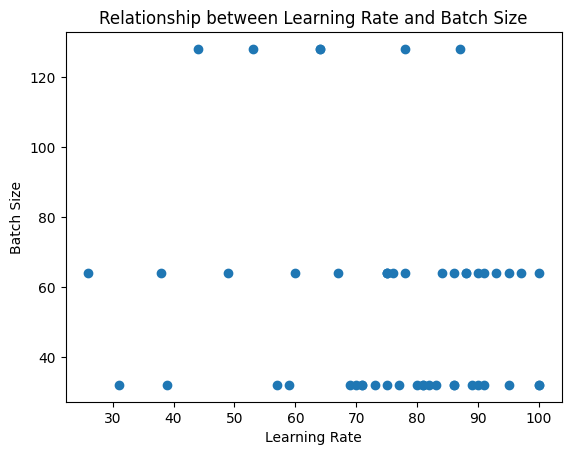

In [ ]:


# Assuming 'study' is your Optuna study object
# Get hyperparameter values for each trial
param1_values = [trial.params['epochs'] for trial in study.trials]
param2_values = [trial.params['batch_size'] for trial in study.trials]

# Scatter plot between two hyperparameters
plt.scatter(param1_values, param2_values)
plt.xlabel('Learning Rate')
plt.ylabel('Batch Size')
plt.title('Relationship between Learning Rate and Batch Size')
plt.show()

In [ ]:
import optuna.visualization as optuna_viz

optuna_viz.plot_contour(study)


In [ ]:
import optuna.visualization as optuna_viz

# Assuming 'study' is your Optuna study object
contour_plot = optuna_viz.plot_contour(study)

# Adjust the size of the plot
contour_plot.update_layout(width=1800, height=1600)




In [ ]:

# Assuming 'study' is your Optuna study object
contour_plot = optuna_viz.plot_contour(study, params=['epochs', 'learning_rate_sgd'])

# Adjust the size of the plot
contour_plot.update_layout(width=800, height=600)

In [ ]:
# Assuming 'study' is your Optuna study object
contour_plot = optuna_viz.plot_contour(study, params=['dropout_rate', 'learning_rate_sgd'])

# Adjust the size of the plot
contour_plot.update_layout(width=800, height=600)

In [ ]:
# Assuming 'study' is your Optuna study object
contour_plot = optuna_viz.plot_contour(study, params=['batch_size', 'learning_rate_sgd'])

# Adjust the size of the plot
contour_plot.update_layout(width=800, height=600)

## **Using best Hyper parameters train model**

In [ ]:
# Define the Keras model with hyperparameters
from keras.applications import MobileNetV2


In [ ]:

    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False


    # Create a new model and set MobileNetV2 as its input
    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())  # Global average pooling layer
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.2029146518720278))
    model.add(Dense(12, activation='softmax'))

In [ ]:
model.compile(optimizer=SGD(learning_rate=0.03467920208576053),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint("best_hyper_model.h5",
                             monitor='val_accuracy',  # You can choose the metric to monitor (e.g., 'val_accuracy')
                             save_best_only=True,  # Save only the best model
                             mode='max',  # 'min' for loss, 'max' for accuracy, etc.
                             verbose=1)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=180,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        vertical_flip=True
        )
datagen.fit(X_train)


In [ ]:
# Train the model
history=model.fit(datagen.flow(X_train, train_label,batch_size=64) ,epochs=76,  validation_data=(X_valid, valid_label), callbacks=[checkpoint])

Epoch 1/76
63/63 [==============================] - ETA: 0s - loss: 1.6501 - accuracy: 0.4666
Epoch 1: val_accuracy improved from -inf to 0.56068, saving model to best_hyper_model.h5
63/63 [==============================] - 64s 970ms/step - loss: 1.6501 - accuracy: 0.4666 - val_loss: 1.1918 - val_accuracy: 0.5607
Epoch 2/76
63/63 [==============================] - ETA: 0s - loss: 1.0138 - accuracy: 0.6545
Epoch 2: val_accuracy improved from 0.56068 to 0.67402, saving model to best_hyper_model.h5
63/63 [==============================] - 59s 930ms/step - loss: 1.0138 - accuracy: 0.6545 - val_loss: 0.9302 - val_accuracy: 0.6740
Epoch 3/76
63/63 [==============================] - ETA: 0s - loss: 0.8507 - accuracy: 0.7081
Epoch 3: val_accuracy improved from 0.67402 to 0.72016, saving model to best_hyper_model.h5
63/63 [==============================] - 60s 946ms/step - loss: 0.8507 - accuracy: 0.7081 - val_loss: 0.8140 - val_accuracy: 0.7202
Epoch 4/76
63/63 [==============================]

### **CALLING SAVED MODEL**

In [ ]:
model1 = load_model('best_hyper_model.h5')

In [ ]:
print(os.path.getsize("best_hyper_model.h5")/1048576, "MB")

In [ ]:
datagen.fit(X_train)

In [ ]:
loss, acc = model1.evaluate(X_test,test_label)
loss1, acc1 = model1.evaluate(X_valid,valid_label)
loss2, acc2 = model1.evaluate(datagen.flow(X_valid,valid_label))
print('Test loss:', loss,'   Test accuracy:', acc)
print('Train loss:', loss1,'   Train accuracy:',acc1)
print('Train loss:', loss2,'   Train accuracy:',acc2)

32/32 [==============================] - 13s 387ms/step - loss: 0.4343 - accuracy: 0.8506
Test loss: 0.3466132581233978    Test accuracy: 0.8808664083480835
Train loss: 0.3757677376270294    Train accuracy: 0.8716148734092712
Train loss: 0.434325635433197    Train accuracy: 0.8505516648292542


18/18 [==============================] - 4s 188ms/step


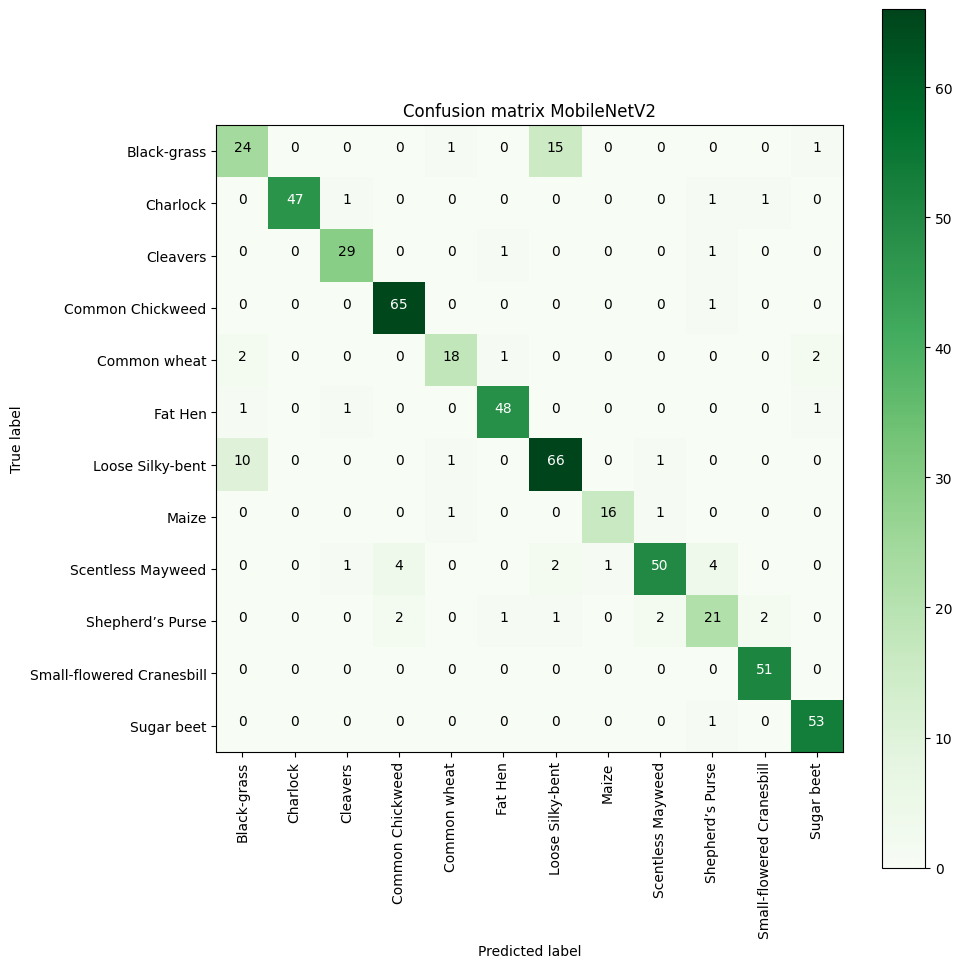

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix MobileNetV2',
                          cmap=plt.cm.Greens):

    fig = plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
predY = model1.predict(X_test)
predYClasses = np.argmax(predY, axis = 1)
trueY = np.argmax(test_label, axis = 1)

# confusion matrix
confusionMTX = confusion_matrix(trueY, predYClasses)

# plot the confusion matrix
plot_confusion_matrix(confusionMTX, classes = class_names_lst)

In [ ]:
from sklearn.metrics import f1_score

print(f1_score(trueY, predYClasses, average='macro')) # macro, take the average of each class’s F-1 score:
print(f1_score(trueY, predYClasses, average='micro')) #micro calculates positive and negative values globally
print(f1_score(trueY, predYClasses, average='weighted')) #F-1 scores are averaged by using the number of instances in a class as weight
print(f1_score(trueY, predYClasses, average=None))

In [ ]:
from sklearn.metrics import classification_report

# Define your title
title = "Classification Report MobileNetV2"

# Calculate the padding to center the title
padding_length = (80 - len(title)) // 2

# Create the formatted title with centered and bold text
formatted_title = f"\033[1;32;47m{' ' * padding_length}{title}{' ' * padding_length}\033[m"

# Print the formatted title
print(formatted_title)

print(classification_report(trueY, predYClasses, target_names=class_names_lst))

                       Classification Report MobileNetV2                       
                           precision    recall  f1-score   support

              Black-grass       0.65      0.59      0.62        41
                 Charlock       1.00      0.94      0.97        50
                 Cleavers       0.91      0.94      0.92        31
         Common Chickweed       0.92      0.98      0.95        66
             Common wheat       0.86      0.78      0.82        23
                  Fat Hen       0.94      0.94      0.94        51
         Loose Silky-bent       0.79      0.85      0.81        78
                    Maize       0.94      0.89      0.91        18
        Scentless Mayweed       0.93      0.81      0.86        62
         Shepherd’s Purse       0.72      0.72      0.72        29
Small-flowered Cranesbill       0.94      1.00      0.97        51
               Sugar beet       0.93      0.98      0.95        54

                 accuracy                      

**Observation:**



*   Recall is very low for Black-grass.
*   Precison is below .70 for Black grass.
*   Even from Confusion matrix, we see model did not perform well for black grass.
*   Other classes have better balane between precision and recall and a goof f1 score.

Overall Accuracy is also great.





In [ ]:
from sklearn.metrics import multilabel_confusion_matrix

multilabel_confusion_matrix(trueY, predYClasses)

array([[[500,  13],
        [ 17,  24]],

       [[504,   0],
        [  3,  47]],

       [[520,   3],
        [  2,  29]],

       [[482,   6],
        [  1,  65]],

       [[528,   3],
        [  5,  18]],

       [[500,   3],
        [  3,  48]],

       [[458,  18],
        [ 12,  66]],

       [[535,   1],
        [  2,  16]],

       [[488,   4],
        [ 12,  50]],

       [[517,   8],
        [  8,  21]],

       [[500,   3],
        [  0,  51]],

       [[496,   4],
        [  1,  53]]])

**Each plant category level TP, FP, FN, TN can be seen from above matrix:**

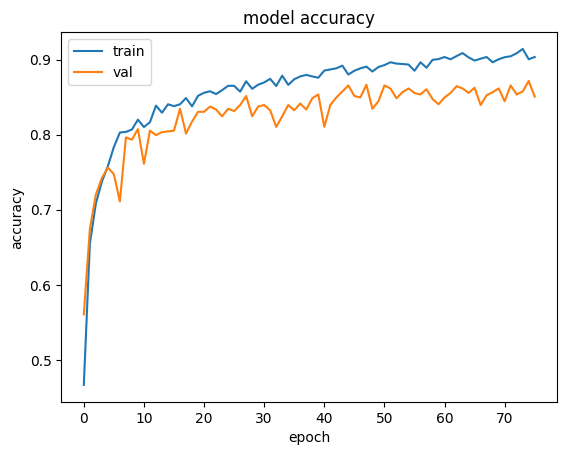

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()




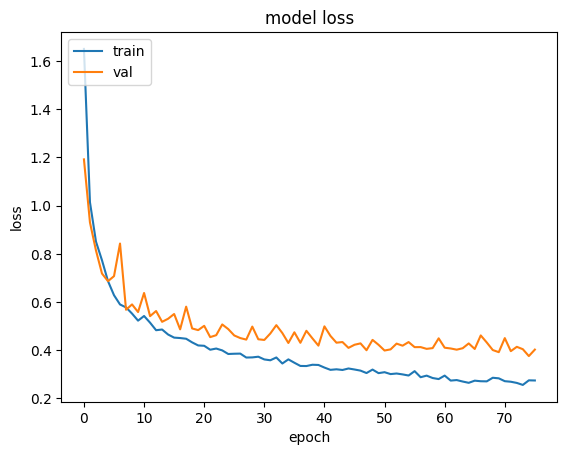

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


**Observation:**


*   Loss is decreasing and val loss is close to training loss
*   Accuracy of val set is also close to training accuracy
*   No overfitting or underfitting observerd based on the scores of val and testing sets





